In [3]:
import os
from md_diffusion_sampling import read_position_array
from msd_fft import calculate_diffusion_coefficient
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [4]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'
mol_name = 'DC_Cu110'
temperature = '200'

### Read position data and run diffusivity calculation

In [12]:
ALL_DATA = {}
for sim_type in ['temperature-flexible', 'temperature-rigid']:
    DATA = {}
    simdir = '%s/%s/%s/%s' % (data_dir, sim_type, mol_name, temperature)
    for run in range(20):
        runs = list(range(1, run + 2))
        simlist = [os.path.join(simdir, str(r)) for r in runs]
        pos_array = read_position_array(simlist, directions=['x', 'y', 'z'], t_skip=2, log='log.%s' % mol_name)
        DATA[run + 1] = calculate_diffusion_coefficient(pos_array, average_frames=1, fs_per_frame=1000)
    ALL_DATA[sim_type.split('-')[1]] = DATA

1 runs:
Run ids:  {'1': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (1.60 - 3.20 ns; $R^2$ = 0.999):
D = 5.138E-05 $cm^2 / s$
2 runs:
Run ids:  {'1': 0, '2': 1}
200 | Shape: (8001 frames, 2 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 0.999):
D = 5.857E-05 $cm^2 / s$
3 runs:
Run ids:  {'1': 0, '2': 1, '3': 2}
200 | Shape: (8001 frames, 3 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 0.996):
D = 5.527E-05 $cm^2 / s$
4 runs:
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3}
200 | Shape: (8001 frames, 4 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 0.995):
D = 4.083E-05 $cm^2 / s$
5 runs:
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}
200 | Shape: (8001 frames, 5 runs, 3 dimensions) | Saved: None
Best fit: (1.60 - 3.20 ns; $R^2$ = 0.992):
D = 2.657E-05 $cm^2 / s$
6 runs:
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5}
200 | Shape: (8001 frames, 6 runs, 3 dimensions) | Saved: None


200 | Shape: (8001 frames, 16 runs, 3 dimensions) | Saved: None
Best fit: (0.80 - 4.00 ns; $R^2$ = 0.999):
D = 1.609E-05 $cm^2 / s$
17 runs:
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16}
200 | Shape: (8001 frames, 17 runs, 3 dimensions) | Saved: None
Best fit: (0.80 - 4.00 ns; $R^2$ = 0.998):
D = 1.533E-05 $cm^2 / s$
18 runs:
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17}
200 | Shape: (8001 frames, 18 runs, 3 dimensions) | Saved: None
Best fit: (0.80 - 4.00 ns; $R^2$ = 0.999):
D = 1.616E-05 $cm^2 / s$
19 runs:
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18}
200 | Shape: (8001 frames, 19 runs, 3 dimensions) | Saved: No

In [13]:
time_ranges = ['0.00-8.00', 'best']
colors = dict(rigid='#CF5955', y='#EAC658', dctst='#66AD9B', flexible='#4e7fad')
shades = dict(rigid='#672C2A', y='#75632C', dctst='#33564D', flexible='#3B4C5C')

### Plot D vs number of runs

<p align="center"><img src="/assets/img/presentations/nanocar/dc-cu110-effect-of-sampling.png" height=250></p>


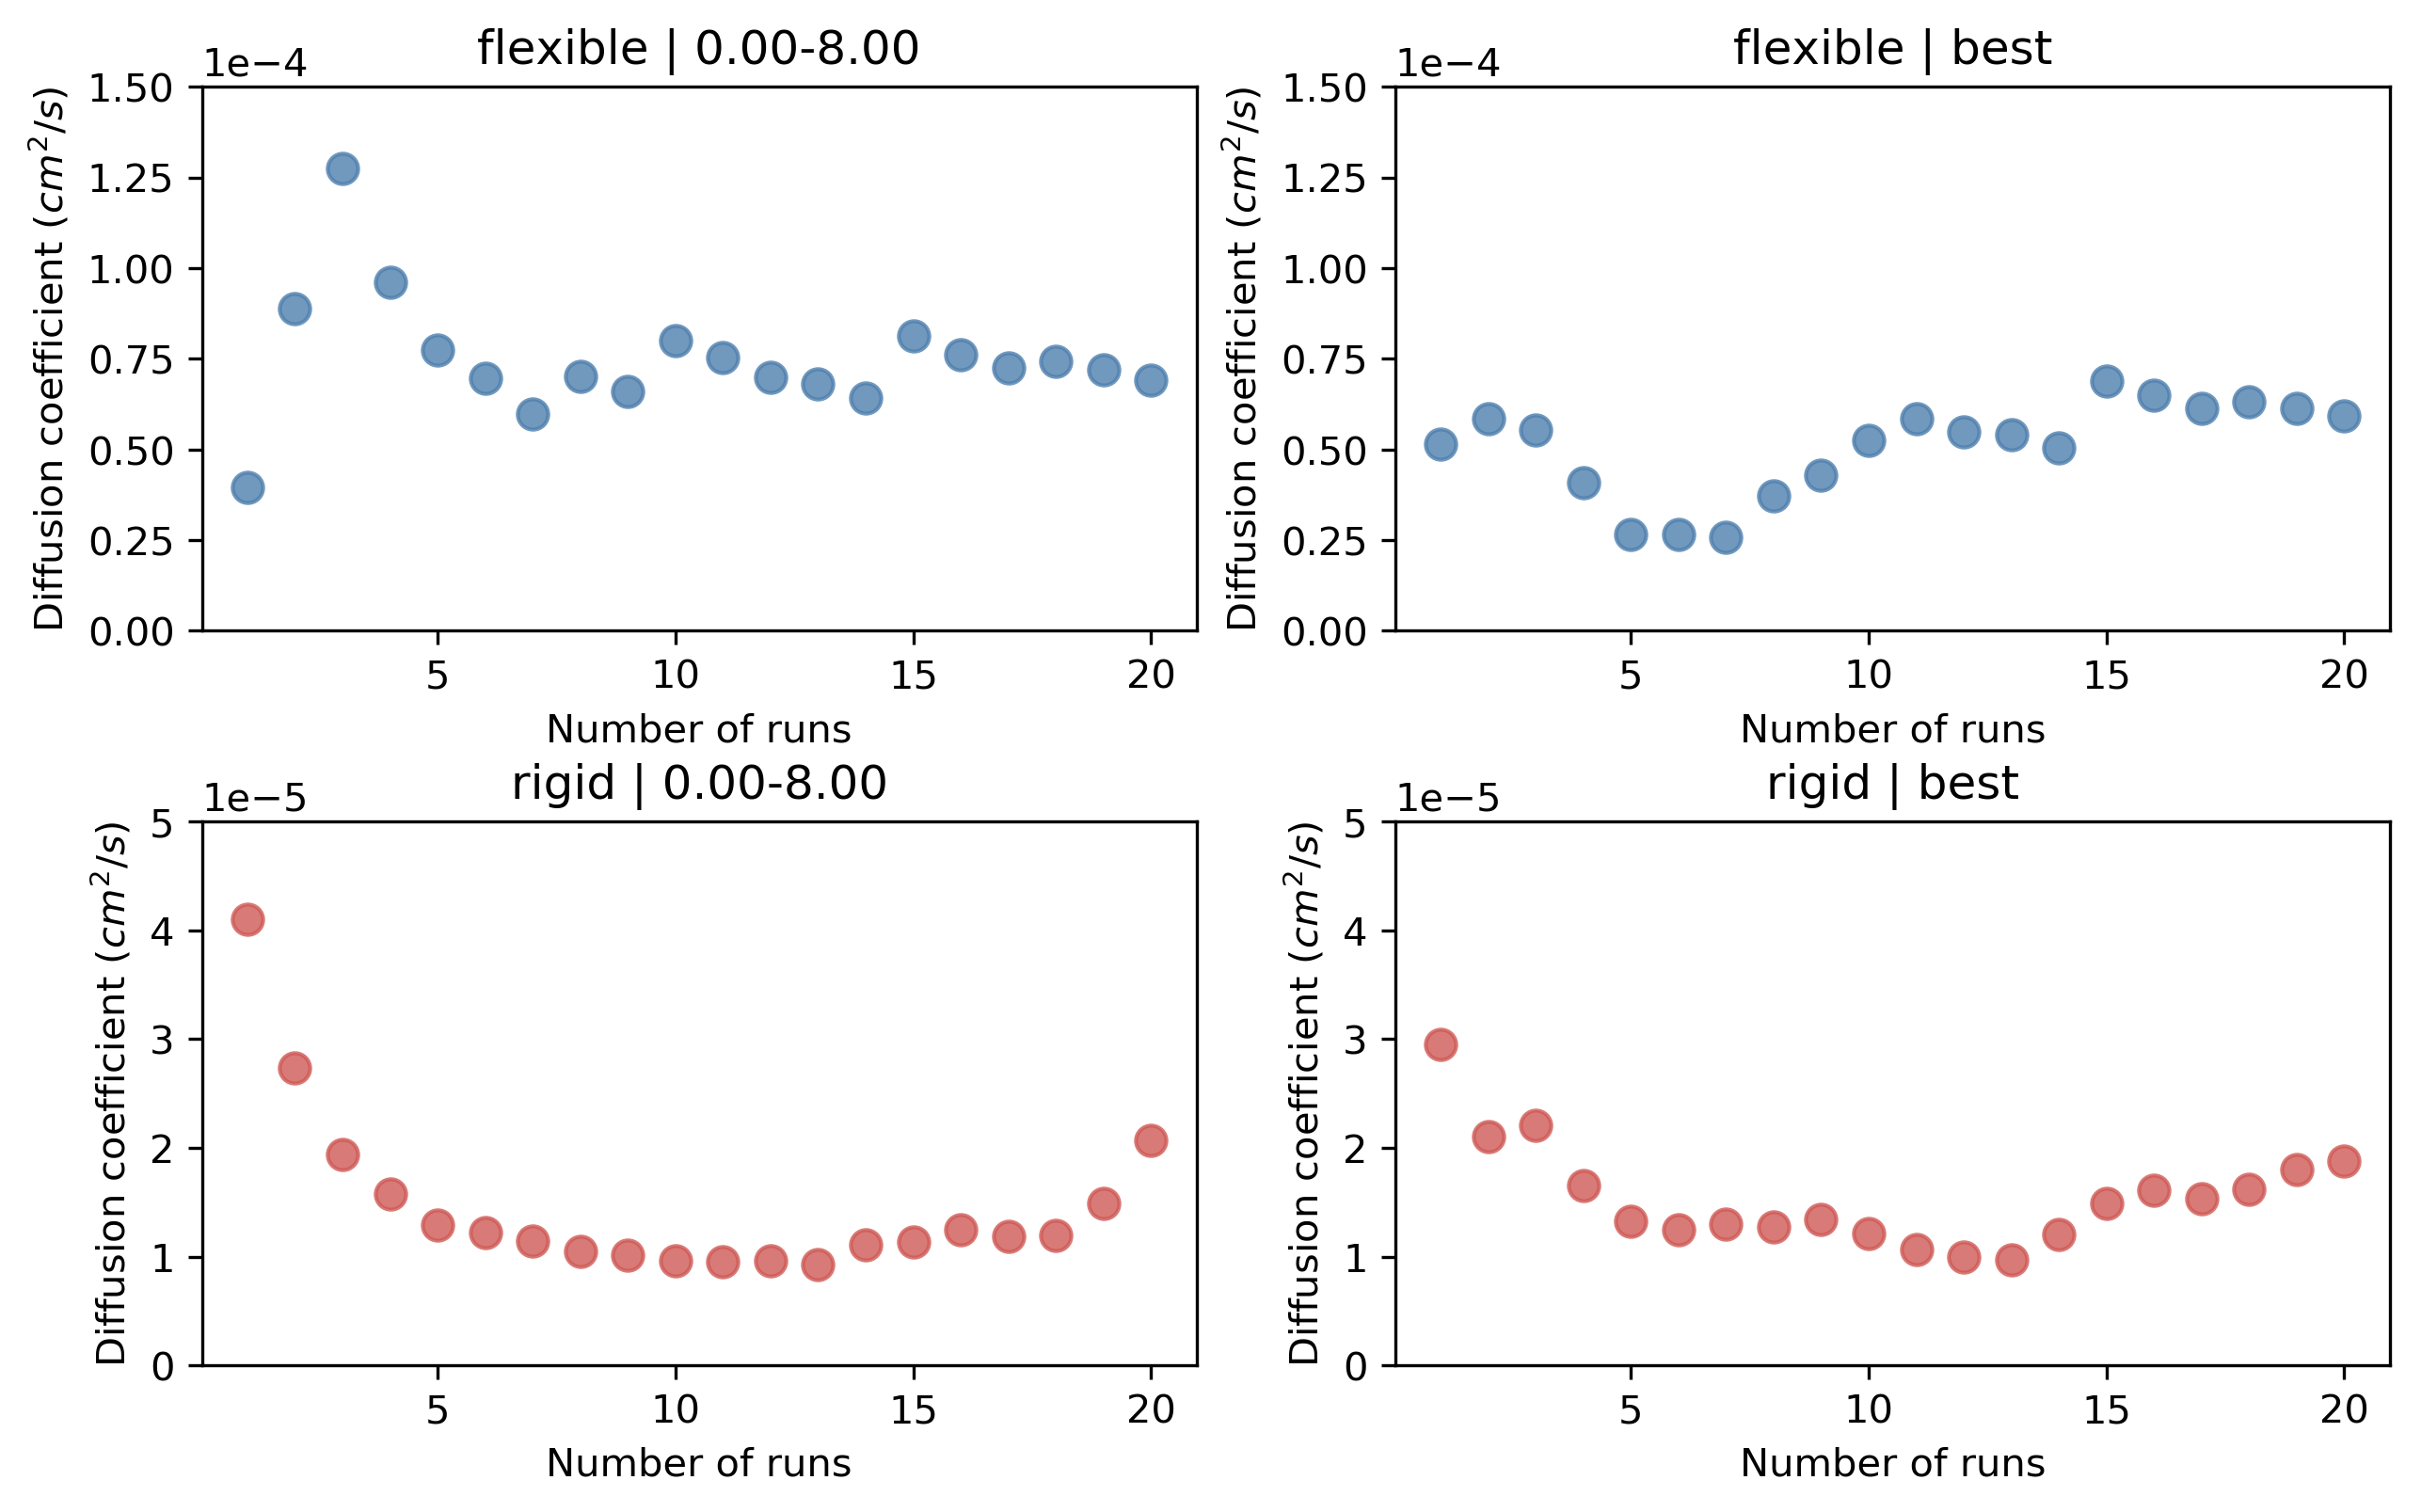

In [42]:
fig = plt.figure(figsize=(10, 6), dpi=300)
fig.subplots_adjust(wspace=0.2, hspace=0.35)
fit_ranges = ['0.00-8.00', 'best']
ylims = dict(flexible=(0, 1.5e-4), rigid=(0, .5e-4))
runs = list(range(1, 21))
idx = 1
for sim_type in ALL_DATA:
    for fit_range in fit_ranges:
        ax = fig.add_subplot(len(fit_ranges), 2, idx)
        diff = [ALL_DATA[sim_type][r][fit_range]['cm2/s'] for r in runs]
        ax.scatter(runs, diff, alpha=0.8, s=60, c=colors[sim_type])
        ax.set_ylim(ylims[sim_type])
        ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
        ax.set_xlabel('Number of runs')
        ax.set_title('%s | %s' % (sim_type, fit_range))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        idx += 1
        
pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'dc-cu110-effect-of-sampling.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Calculate diffusion for each simulation separately

In [43]:
ALL_DATA = {}
for sim_type in ['temperature-flexible', 'temperature-rigid']:
    DATA = {}
    simdir = '%s/%s/%s/%s' % (data_dir, sim_type, mol_name, temperature)
    for run in range(1, 21):
        simlist = [os.path.join(simdir, str(run))]
        pos_array = read_position_array(simlist, directions=['x', 'y', 'z'], t_skip=2, log='log.%s' % mol_name)
        DATA[run] = calculate_diffusion_coefficient(pos_array, average_frames=1, fs_per_frame=1000)
    ALL_DATA[sim_type.split('-')[1]] = DATA

1 runs:
Run ids:  {'1': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (1.60 - 3.20 ns; $R^2$ = 0.999):
D = 5.138E-05 $cm^2 / s$
1 runs:
Run ids:  {'2': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (1.60 - 3.20 ns; $R^2$ = 0.997):
D = 6.764E-05 $cm^2 / s$
1 runs:
Run ids:  {'3': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 0.948):
D = 4.868E-05 $cm^2 / s$
1 runs:
Run ids:  {'4': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (2.40 - 4.00 ns; $R^2$ = 0.901):
D = 2.317E-06 $cm^2 / s$
1 runs:
Run ids:  {'5': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (2.00 - 4.00 ns; $R^2$ = 0.988):
D = -2.948E-05 $cm^2 / s$
1 runs:
Run ids:  {'6': 0}
200 | Shape: (8001 frames, 1 runs, 3 dimensions) | Saved: None
Best fit: (2.40 - 4.00 ns; $R^2$ = 0.997):
D = 3.724E-05 $cm^2 / s$
1 runs:
Run ids:  {'7': 0}
200 | Shape: (8001 frame

### Plot averaged diffusion coefficients with std error
$ err = \dfrac{\sigma}{sqrt(n)} $   $ \sigma: standard deviation $   $ n: number of samples $

<p align="center"><img src="/assets/img/presentations/nanocar/dc-cu110-effect-of-sampling.png" height=250></p>


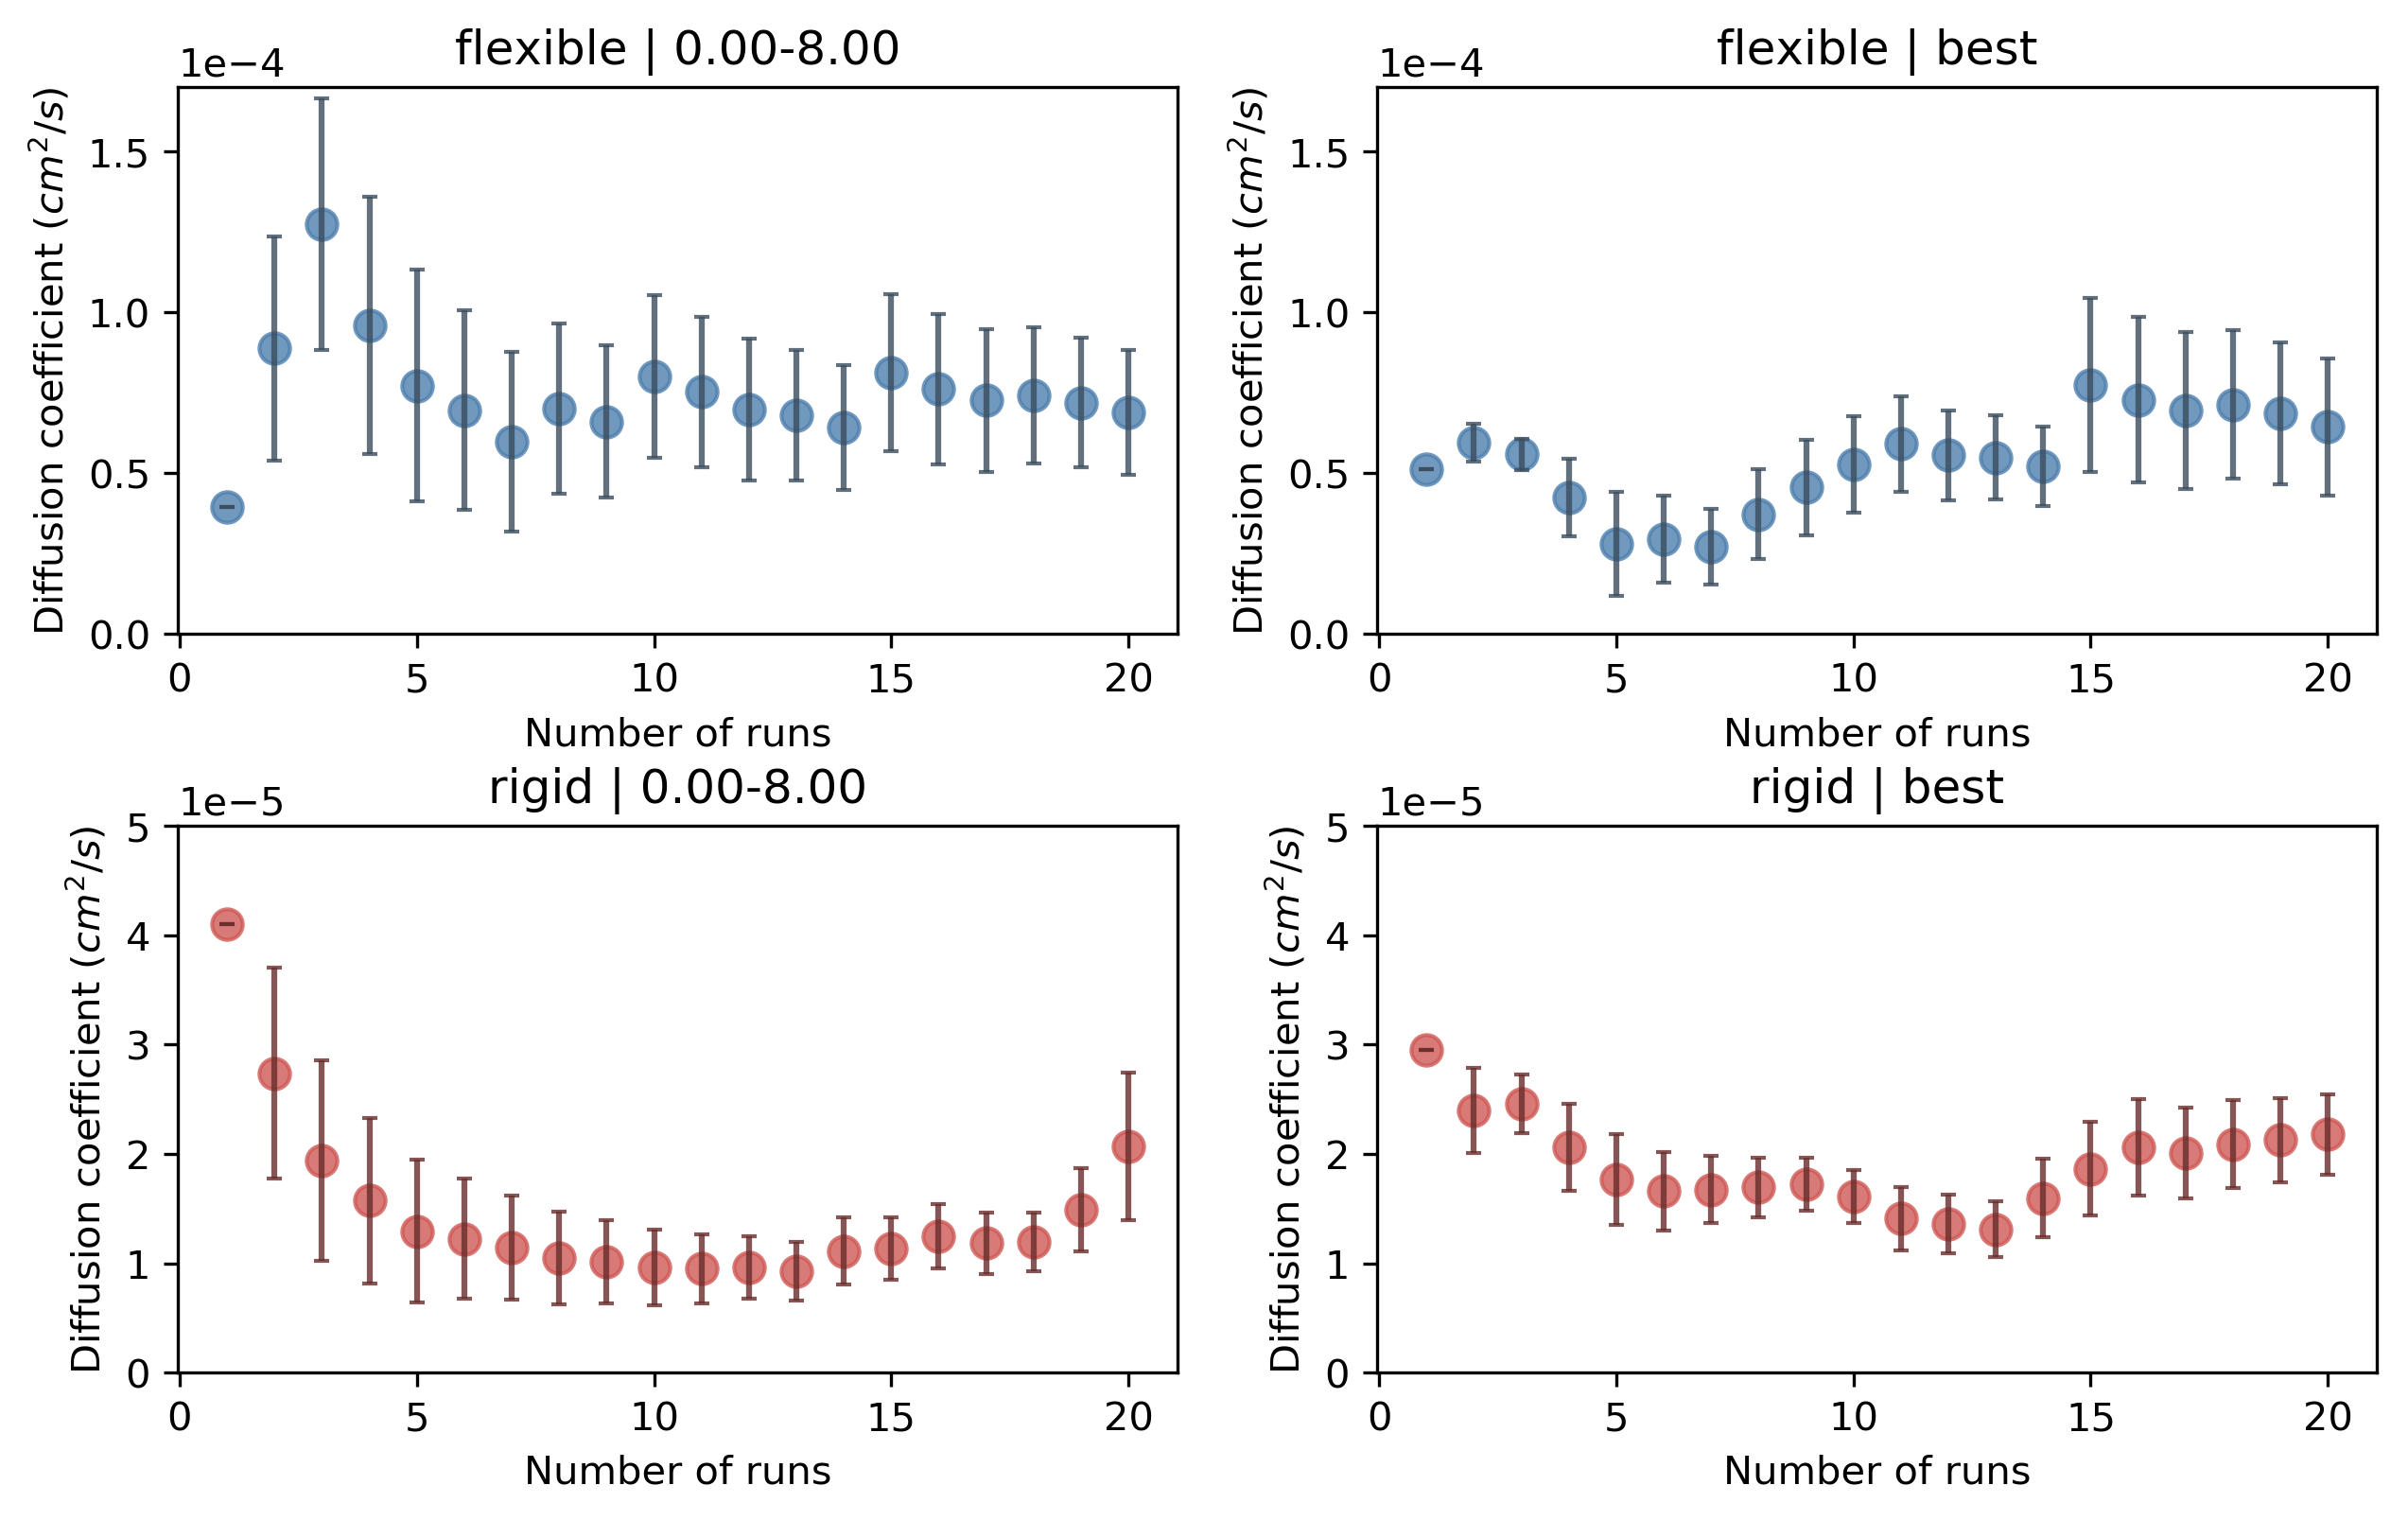

In [78]:
fig = plt.figure(figsize=(10, 6), dpi=300)
fig.subplots_adjust(wspace=0.2, hspace=0.35)
fit_ranges = ['0.00-8.00', 'best']
ylims = dict(flexible=(0, 1.7e-4), rigid=(0, .5e-4))
runs = list(range(1, 21))
idx = 1
for sim_type in ALL_DATA:
    for fit_range in fit_ranges:
        diff, diff_err, runs = [], [], []
        for run in range(1, 21):
            avg_runs = list(range(1, run + 1))
            diff.append(np.average([ALL_DATA[sim_type][r][fit_range]['cm2/s'] for r in avg_runs], axis=0))
            diff_err.append(np.std([ALL_DATA[sim_type][r][fit_range]['cm2/s'] for r in avg_runs]) / np.sqrt(len(avg_runs)))
            runs.append(run)
        ax = fig.add_subplot(len(fit_ranges), 2, idx)
        ax.errorbar(runs, diff, yerr=diff_err, linestyle="None", capsize=2, c=shades[sim_type], alpha=0.8)
        ax.scatter(runs, diff, alpha=0.8, s=60, c=colors[sim_type])
        
        ax.set_ylim(ylims[sim_type])
        ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
        ax.set_xlabel('Number of runs')
        ax.set_title('%s | %s' % (sim_type, fit_range))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        idx += 1
        
pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'dc-cu110-effect-of-sampling.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Plot diffusion coefficient for each run (not averaged)

<p align="center"><img src="/assets/img/presentations/nanocar/dc-cu110-diff-per-run.png" height=250></p>


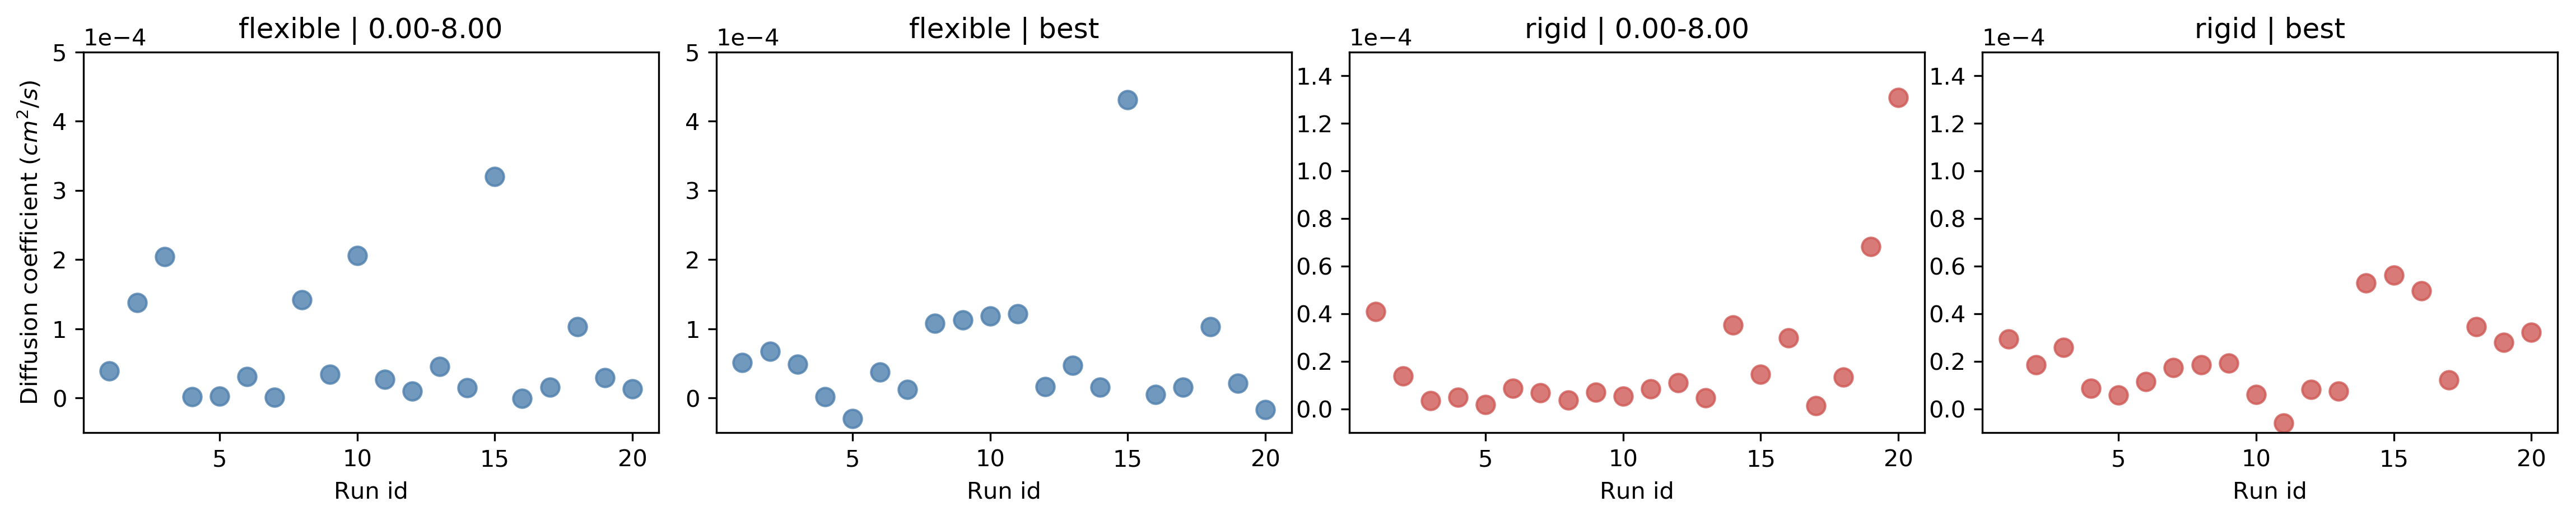

In [86]:
fig = plt.figure(figsize=(19, 3), dpi=300)
fig.subplots_adjust(wspace=0.1, hspace=0.35)
fit_ranges = ['0.00-8.00', 'best']
ylims = dict(flexible=(-5e-5, 5e-4), rigid=(-1e-5, 1.5e-4))
runs = list(range(1, 21))
idx = 1
for sim_type in ALL_DATA:
    for fit_range in fit_ranges:
        diff = [ALL_DATA[sim_type][r][fit_range]['cm2/s'] for r in runs]

        ax = fig.add_subplot(1, 4, idx)
        ax.scatter(runs, diff, alpha=0.8, s=60, c=colors[sim_type])
        
        ax.set_ylim(ylims[sim_type])
        if idx == 1:
            ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
        ax.set_xlabel('Run id')
        ax.set_title('%s | %s' % (sim_type, fit_range))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        idx += 1
        
pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'dc-cu110-diff-per-run.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)